In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
A2=np.array([[ 0,  1,  0,  1,  0,  0,  0,  0],
             [ 1,  0,  1,  0,  1,  0,  0,  0],
             [ 0,  1,  0,  0,  0,  1,  0,  0],
             [ 1,  0,  0,  0,  1,  0,  1,  0],
             [ 0,  1,  0,  1,  0,  1,  1,  0],
             [ 0,  0,  1,  0,  1,  0,  0,  1],
             [ 0,  0,  0,  1,  1,  0,  0,  1],
             [ 0,  0,  0,  0,  0,  1,  1,  0]])

In [4]:
def draw_graph(A):
    plt.figure()
    g = nx.Graph()
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if i<=j:
                if A[i,j] == 1:
                    g.add_edge(i+1,j+1)
    nx.draw_spectral(g, with_labels=True)


In [5]:
def convert_adjacency(A):
    graph = []
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if i <= j:
                if A[i,j] == 1:
                    graph.append([i+1,j+1])
    return graph

In [6]:
graph = convert_adjacency(A2)
cycles = []
def main():
    global graph  
    global cycles
    for edge in graph:
        for node in edge:
            findNewCycles([node])
#     return cycles
    for cy in cycles:
        path = [str(node) for node in cy]
        s = ",".join(path)
        print(s)

def findNewCycles(path):
    start_node = path[0]
    next_node= None
    sub = []

    #visit each edge and each node of each edge
    for edge in graph:
        node1, node2 = edge
        if start_node in edge:
                if node1 == start_node:
                    next_node = node2
                else:
                    next_node = node1
                if not visited(next_node, path):
                        # neighbor node not on path yet
                        sub = [next_node]
                        sub.extend(path)
                        # explore extended path
                        findNewCycles(sub);
                elif len(path) > 2  and next_node == path[-1]:
                        # cycle found
                        p = rotate_to_smallest(path);
                        inv = invert(p)
                        if isNew(p) and isNew(inv):
                            cycles.append(p)

def invert(path):
    return rotate_to_smallest(path[::-1])

#  rotate cycle path such that it begins with the smallest node
def rotate_to_smallest(path):
    n = path.index(min(path))
    return path[n:]+path[:n]

def isNew(path):
    return not path in cycles

def visited(node, path):
    return node in path

main()

1,4,5,6,3,2
1,4,7,5,6,3,2
1,4,7,8,6,3,2
1,4,5,7,8,6,3,2
1,4,5,2
1,4,7,8,6,5,2
1,4,7,5,2
2,5,6,3
2,5,4,7,8,6,3
2,5,7,8,6,3
4,7,8,6,5
4,7,5
5,7,8,6


In [7]:
cycles.sort(key=len)
cycles

[[4, 7, 5],
 [1, 4, 5, 2],
 [2, 5, 6, 3],
 [5, 7, 8, 6],
 [1, 4, 7, 5, 2],
 [4, 7, 8, 6, 5],
 [1, 4, 5, 6, 3, 2],
 [2, 5, 7, 8, 6, 3],
 [1, 4, 7, 5, 6, 3, 2],
 [1, 4, 7, 8, 6, 3, 2],
 [1, 4, 7, 8, 6, 5, 2],
 [2, 5, 4, 7, 8, 6, 3],
 [1, 4, 5, 7, 8, 6, 3, 2]]

In [8]:
def select_fundamental_cycles(cycles):
    fundamental_cycle_set = []
    cycles.sort(key=len)
    for i in range(len(cycles)):
        if(i<4):
            fundamental_cycle_set.append(cycles[i])
    return fundamental_cycle_set  

In [9]:
sets = select_fundamental_cycles(cycles)
sets

[[4, 7, 5], [1, 4, 5, 2], [2, 5, 6, 3], [5, 7, 8, 6]]

In [10]:
def extend_length(sets):
    
    for i in range(len(sets)):
        for j in range(8-len(sets[i])):
             sets[i].extend([0])
    return sets

In [11]:
c = extend_length(sets)
c

[[4, 7, 5, 0, 0, 0, 0, 0],
 [1, 4, 5, 2, 0, 0, 0, 0],
 [2, 5, 6, 3, 0, 0, 0, 0],
 [5, 7, 8, 6, 0, 0, 0, 0]]

In [12]:
def convert_to_adjacency(cycles, A):
    
    no_of_cycles = len(cycles)
    no_of_vertices = (A.shape[0])
    
    MD = {}

    for k in range(len(cycles)):
        MD['M'+str(k)] = np.zeros((no_of_vertices,no_of_vertices))
        for j in range(no_of_vertices):
            if(cycles[k][j]!=0):
                if(cycles[k][j+1]!=0):
                    MD["M"+str(k)][cycles[k][j]-1][cycles[k][j+1]-1] = 1
                    MD["M"+str(k)][cycles[k][j+1]-1][cycles[k][j]-1] = 1
                else:
                    MD["M"+str(k)][cycles[k][j]-1][cycles[k][0]-1] = 1
                    MD["M"+str(k)][cycles[k][0]-1][cycles[k][j]-1] = 1  
                    
    return MD

In [13]:
MD = convert_to_adjacency(c, A2)

In [14]:
MD

{'M0': array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 'M1': array([[0., 1., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 'M2': array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

In [15]:
R = np.zeros((8,8),dtype='object')
R[0,1] = 10
R[1,2] = 20
R[3,4] = 100
R[1,4] = 200
R[4,5] = 100
R[4,6] = 210
R[6,7] = 20
R[1,0] = 10
R[2,1] = 20
R[4,3] = 100
R[4,1] = 200
R[5,4] = 100
R[6,4] = 210
R[7,6] = 20
print(R)

[[0 10 0 0 0 0 0 0]
 [10 0 20 0 200 0 0 0]
 [0 20 0 0 0 0 0 0]
 [0 0 0 0 100 0 0 0]
 [0 200 0 100 0 100 210 0]
 [0 0 0 0 100 0 0 0]
 [0 0 0 0 210 0 0 20]
 [0 0 0 0 0 0 20 0]]


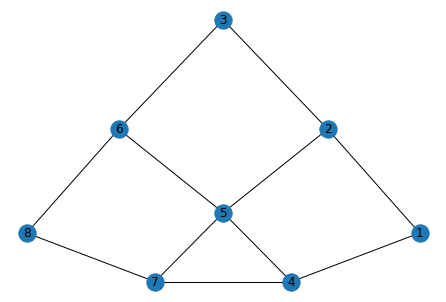

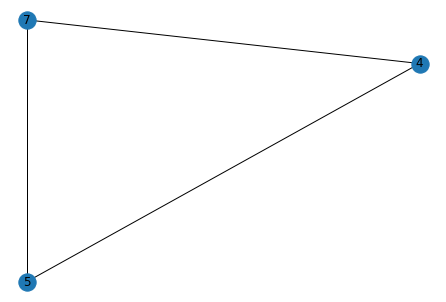

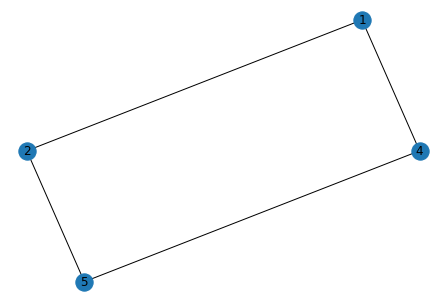

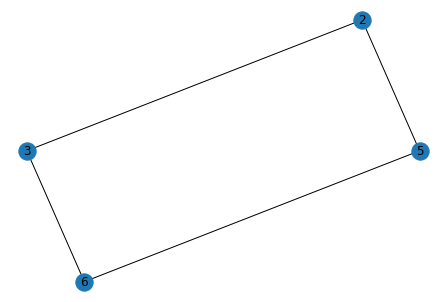

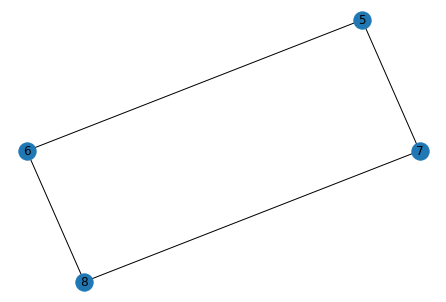

In [16]:
draw_graph(A2)
draw_graph(MD['M0'])
draw_graph(MD['M1'])
draw_graph(MD['M2'])
draw_graph(MD['M3'])

In [44]:
def equations(MD, R):
    eq = {}
    for i in range(len(MD)):
        count = 0
        for j in range(MD['M'+str(i)].shape[0]):
            for k in range(MD['M'+str(i)].shape[0]):
                if j<=k:
                    if MD['M'+str(i)][j,k] == 1:
                        if count == 0:
                            temp = '(' + ('I'+str(i))*int(MD['M'+str(i)][j,k]) + ('-I'+str((i+1)%4))*int(MD['M'+str((i+1)%4)][j,k]) + ('-I'+str((i+2)%4))*int(MD['M'+str((i+2)%4)][j,k]) + ('-I'+str((i+3)%4))*int(MD['M'+str((i+3)%4)][j,k]) + ')'
                            temp = temp + str('*') + str(R[j,k])
                            eq[i] = temp
                            count = 1
                            
                        else:
                            temp = '(' + ('I'+str(i))*int(MD['M'+str(i)][j,k]) + ('-I'+str((i+1)%4))*int(MD['M'+str((i+1)%4)][j,k]) + ('-I'+str((i+2)%4))*int(MD['M'+str((i+2)%4)][j,k]) + ('-I'+str((i+3)%4))*int(MD['M'+str((i+3)%4)][j,k]) + ')'
                            temp = temp + str('*') + str(R[j,k])
                            eq[i] = eq[i] + ' + ' + temp
    print(eq)
    return eq

In [45]:
MD['M0']

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [46]:
eq = equations(MD, R)

{0: '(I0-I1)*100 + (I0)*0 + (I0-I3)*210', 1: '(I1)*10 + (I1)*0 + (I1-I2)*200 + (I1-I0)*100', 2: '(I2)*20 + (I2-I1)*200 + (I2)*0 + (I2-I3)*100', 3: '(I3-I2)*100 + (I3-I0)*210 + (I3)*0 + (I3)*20'}


In [40]:
from numpy import linalg

system = [[310,-100,0,-210],[-100,310,-200,0],[0,-200,320,-100],[-210,0,-100,330]]
nmat = np.array(system)
vals = np.array([10,0,0,0])
answer = linalg.solve(nmat,vals)

In [41]:
answer

array([0.23874266, 0.19987217, 0.19043054, 0.20963337])